1. For questions 1 to 3, use the following data consisting of 8 points (xi, yi).

  xi 1.0 1.8 0.9 8.2 9.1 7.8 7.6 8.8

  yi 1.5 1.2 1.6 7.3 7.2 9.5 8.0 7.5

  Fit a GMM with 2 components for this data. What are the mixing coefficients of the learned components? (Note: Use the sklearn implementation of GMM with random state = 0. Do not change the other default parameters).


2. Using the model trained in question 1, compute the log-likelihood of the following points. Which of these points has the highest likelihood of being sampled from the model?
(a) (2.0, 0.5)
(b) (-1.0, -0.5)
(c) (7.5, 8.0)
(d) (5.0, 5.5)

3. Let Model A be the GMM with 2 components that was trained in question 1. Using the same data from question 1, estimate a GMM with 3 components (Model B). (Note: Use the sklearn implementation of GMM with random state = 0 and all the other default parameters.)Select the pair(s) of points that have the same label in Model A but different labels in Model B.
(a) (1.0, 1.5) and (0.9, 1.6)
(b) (1.8, 1.2) and (0.9, 1.6)
(c) (7.8, 9.5) and (8.8, 7.5)
(d) (7.8, 9.5) and (7.6, 8.0)
(e) (8.2, 7.3) and (7.6, 8.0)

Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

Data points (xi, yi)

In [2]:
X = np.array([[1.0, 1.5], [1.8, 1.2], [0.9, 1.6], [8.2, 7.3],
              [9.1, 7.2], [7.8, 9.5], [7.6, 8.0], [8.8, 7.5]])

Function to plot GMM results with confidence ellipses

In [3]:
def plot_gmm(gmm, X, label):
    plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis')
    ax = plt.gca()

    for pos, covar, weight in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, ax)

    plt.title(f"GMM Clustering with {gmm.n_components} Components - {label}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

Function to draw ellipses for covariance

In [4]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs, fill=False))

Fit GMM with 2 components

In [6]:
gmm_2 = GaussianMixture(n_components=2, random_state=0).fit(X)

Display parameters of the GMM

In [7]:
print("GMM with 2 components")
print("Means:\n", gmm_2.means_)
print("Covariances:\n", gmm_2.covariances_)
print("Mixing coefficients (weights):\n", gmm_2.weights_)

GMM with 2 components
Means:
 [[8.3        7.9       ]
 [1.23333333 1.43333333]]
Covariances:
 [[[ 0.328001   -0.314     ]
  [-0.314       0.716001  ]]

 [[ 0.16222322 -0.06777778]
  [-0.06777778  0.02888989]]]
Mixing coefficients (weights):
 [0.625 0.375]


Compute responsibilities (probabilities of each data point belonging to each component)

In [8]:
responsibilities = gmm_2.predict_proba(X)
print("\nResponsibilities:\n", responsibilities)


Responsibilities:
 [[1.23628929e-130 1.00000000e+000]
 [6.43986538e-117 1.00000000e+000]
 [1.50958895e-131 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]]


Visualize the 2-component GMM

<ipython-input-7-6d215b734c83>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis')
<ipython-input-8-f17617465605>:13: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


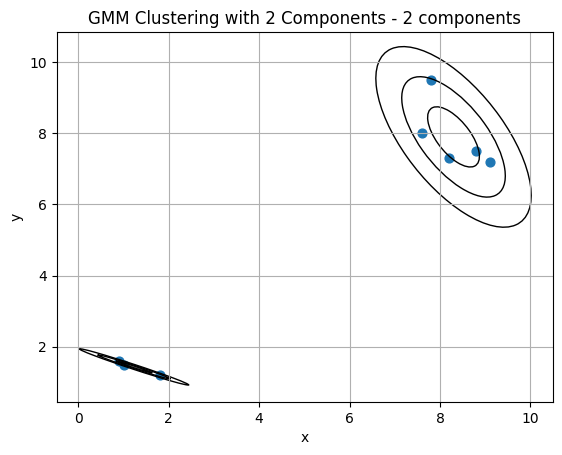

In [ ]:
plot_gmm(gmm_2, X, label="2 components")

Log-likelihood for the given points

In [ ]:
points = np.array([[2.0, 0.5], [-1.0, -0.5], [7.5, 8.0], [5.0, 5.5]])
log_likelihood = gmm_2.score_samples(points)
print("\nLog-Likelihood for the points:")
for i, p in enumerate(points):
    print(f"Point {p}: Log-Likelihood = {log_likelihood[i]}")


Log-Likelihood for the points:
Point [2.  0.5]: Log-Likelihood = -278.94459652214124
Point [-1.  -0.5]: Log-Likelihood = -493.52058280091677
Point [7.5 8. ]: Log-Likelihood = -2.8205130137844265
Point [5.  5.5]: Log-Likelihood = -55.109311786953064


Identify point with highest likelihood

In [ ]:
highest_likelihood_point = points[np.argmax(log_likelihood)]
print(f"\nPoint with the highest likelihood: {highest_likelihood_point}")


Point with the highest likelihood: [7.5 8. ]


Fit GMM with 3 components (Model B)

In [ ]:
gmm_3 = GaussianMixture(n_components=3, random_state=0).fit(X)

Display parameters of the 3-component GMM

In [ ]:
print("\nGMM with 3 components")
print("Means:\n", gmm_3.means_)
print("Covariances:\n", gmm_3.covariances_)
print("Mixing coefficients (weights):\n", gmm_3.weights_)


GMM with 3 components
Means:
 [[8.7        7.33333333]
 [1.23333333 1.43333333]
 [7.7        8.75      ]]
Covariances:
 [[[ 0.140001   -0.00666667]
  [-0.00666667  0.01555656]]

 [[ 0.16222322 -0.06777778]
  [-0.06777778  0.02888989]]

 [[ 0.010001    0.075     ]
  [ 0.075       0.562501  ]]]
Mixing coefficients (weights):
 [0.375 0.375 0.25 ]


Visualize the 3-component GMM

<ipython-input-7-6d215b734c83>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis')
<ipython-input-8-f17617465605>:13: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


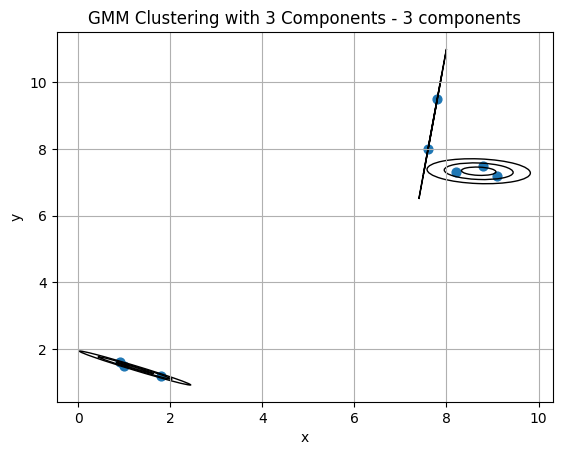

In [ ]:
plot_gmm(gmm_3, X, label="3 components")

Compare labels between Model A (2 components) and Model B (3 components)

In [ ]:
labels_2 = gmm_2.predict(X) # Model A
labels_3 = gmm_3.predict(X) # Model B

print("\nLabels from GMM with 2 components:", labels_2)
print("Labels from GMM with 3 components:", labels_3)


Labels from GMM with 2 components: [1 1 1 0 0 0 0 0]
Labels from GMM with 3 components: [1 1 1 0 0 2 2 0]


Points that have the same label in Model A but different labels in Model B


In [ ]:
pairs = {
    "(1.0, 1.5) and (0.9, 1.6)": (0, 2),
    "(1.8, 1.2) and (0.9, 1.6)": (1, 2),
    "(7.8, 9.5) and (8.8, 7.5)": (5, 7),
    "(7.8, 9.5) and (7.6, 8.0)": (5, 6),
    "(8.2, 7.3) and (7.6, 8.0)": (3, 6)
}

for pair, (i, j) in pairs.items():
    if labels_2[i] == labels_2[j] and labels_3[i] != labels_3[j]:
        print(f"Pair {pair} has the same label in Model A but different labels in Model B.")

Pair (7.8, 9.5) and (8.8, 7.5) has the same label in Model A but different labels in Model B.
Pair (8.2, 7.3) and (7.6, 8.0) has the same label in Model A but different labels in Model B.
